In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(
    os.path.join(
        "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control"
    )
)
if module_path not in sys.path:
    sys.path.append(module_path)

from correlated_noise_q_env_config import (
    q_env_config as gate_q_env_config,
    circuit_context,
    custom_gate_times,
)
from quantumenvironment import QuantumEnvironment
from context_aware_quantum_environment import ContextAwareQuantumEnvironment
from hyperparameter_optimization import HyperparameterOptimizer
from gymnasium.wrappers import RescaleAction, ClipAction

import logging

logging.basicConfig(
    level=logging.WARNING,
    format="%(asctime)s INFO %(message)s",  # hardcoded INFO level
    datefmt="%Y-%m-%d %H:%M:%S",
    stream=sys.stdout,
)

/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



 NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'unitary']
  Instructions with noise: ['custom_kron(rx,ident)_gate']
  Qubits with noise: [0, 1]
  Specific qubit errors: [('custom_kron(rx,ident)_gate', (0, 1))] 

Circuit context
     ┌─────────────────────────────┐     
q_0: ┤0                            ├──■──
     │  custom_kron(rx,ident)_gate │┌─┴─┐
q_1: ┤1                            ├┤ X ├
     └─────────────────────────────┘└───┘


/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [2]:
q_env = ContextAwareQuantumEnvironment(gate_q_env_config, circuit_context, custom_gate_times)
q_env = ClipAction(q_env)
q_env = RescaleAction(q_env, -1.0, 1.0)

q_env.unwrapped.backend

/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/qiskit_ibm_runtime/session.py:156: UserWarning: Session is not supported in local testing mode or when using a simulator.
  warnings.warn(


AerSimulator('aer_simulator'
             noise_model=<NoiseModel on ['custom_kron(rx,ident)_gate']>)

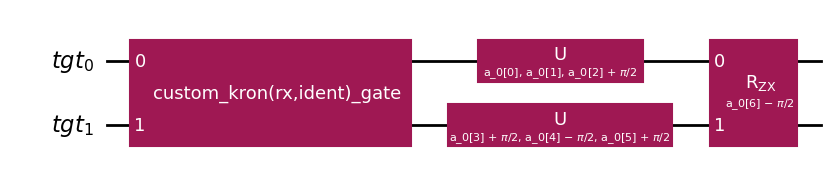

In [3]:
q_env.unwrapped.circuit_truncations[0].draw("mpl")

In [4]:
current_dir = os.getcwd()
grand_parent_dir = os.path.dirname(os.path.dirname(current_dir))

path_agent_config = os.path.join(os.path.dirname(grand_parent_dir), "agent_config.yaml")
path_hpo_config = os.path.join(current_dir, "noise_hpo_config.yaml")
save_results_path = "hpo_results"

In [5]:
experimental_penalty_weights = {
    "runtime": 0.001, # runtime is between 300 and 600 seconds
    "n_shots": 0.005, # shots are between 1 and 20
    "batchsize": 0.003, # batchsize is between 1 and 10
    "sample_paulis": 0.005, # sample_paulis is between 20 and 120
}

In [6]:
type(q_env)

gymnasium.wrappers.rescale_action.RescaleAction

In [7]:
optimizer = HyperparameterOptimizer(
    q_env=q_env,
    # gate_q_env_config=gate_q_env_config,
    # context_aware_calibration=True,
    # circuit_context=circuit_context,
    path_agent_config=path_agent_config,
    path_hpo_config=path_hpo_config,
    save_results_path=save_results_path,
    experimental_penalty_weights=experimental_penalty_weights,
    log_progress=False,
)

In [8]:
q_env.unwrapped.sampling_Pauli_space

160

In [9]:
best_trial = optimizer.optimize_hyperparameters(num_hpo_trials=15)

 92%|█████████▏| 450/491 [01:59<00:10,  3.80it/s]

Starting benchmarking...
Fidelity stored 0.999613189352172
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j,  0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j, -0.70710678+0.j])


 92%|█████████▏| 451/491 [01:59<00:10,  3.79it/s]

Finished Estimator job
mean tensor([-0.1814, -0.4109,  0.3436, -0.3304, -0.0658, -0.0838,  0.0756])
sigma tensor([0.1392, 0.1490, 0.0489, 0.0838, 0.1123, 0.1169, 0.0505])
DFE Rewards Mean: 0.5010301387144651
DFE Rewards standard dev 0.018346090625918833
Returns Mean: 0.6958866
Returns standard dev: 0.03682048
Advantages Mean: -0.009199831
Advantages standard dev 0.036820475
Starting benchmarking...
Fidelity stored 0.9995699394571599
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.70710678+0.j,
 -0.70710678+0.j, -0.5       +0.j])


 92%|█████████▏| 452/491 [02:00<00:10,  3.79it/s]

Finished Estimator job
mean tensor([-0.1679, -0.3798,  0.2981, -0.3007, -0.0621, -0.1091,  0.0751])
sigma tensor([0.1406, 0.1475, 0.0754, 0.1125, 0.1421, 0.1675, 0.0513])
DFE Rewards Mean: 0.4973256603481988
DFE Rewards standard dev 0.017050119383122064
Returns Mean: 0.6883868
Returns standard dev: 0.033866808
Advantages Mean: -0.0001267478
Advantages standard dev 0.03386681
Starting benchmarking...
Fidelity stored 0.9996788506481098
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j,  0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j, -0.70710678+0.j])


 92%|█████████▏| 453/491 [02:00<00:10,  3.80it/s]

Finished Estimator job
mean tensor([-0.1566, -0.3878,  0.3594, -0.3370, -0.0590, -0.0796,  0.0858])
sigma tensor([0.1122, 0.1358, 0.0488, 0.0855, 0.0970, 0.1258, 0.0436])
DFE Rewards Mean: 0.4986313988962805
DFE Rewards standard dev 0.015124647791139862
Returns Mean: 0.69086784
Returns standard dev: 0.0301268
Advantages Mean: -0.028360885
Advantages standard dev 0.0301268
Starting benchmarking...
Fidelity stored 0.9995729063674709
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IY', 'IZ', 'XI', 'XY', 'XZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j,  0.5       +0.j,
 -0.70710678+0.j,  0.70710678+0.j])


 92%|█████████▏| 454/491 [02:00<00:09,  3.98it/s]

Finished Estimator job
mean tensor([-0.1432, -0.3740,  0.3089, -0.3208, -0.0731, -0.1167,  0.0721])
sigma tensor([0.1397, 0.1522, 0.0702, 0.1309, 0.1368, 0.1808, 0.0530])
DFE Rewards Mean: 0.500404834479391
DFE Rewards standard dev 0.02107974953278806
Returns Mean: 0.69485646
Returns standard dev: 0.04252624
Advantages Mean: 0.028195685
Advantages standard dev 0.04252624
Starting benchmarking...
Fidelity stored 0.999606506873608
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IY', 'IZ', 'XI', 'XY', 'XZ'],
              coeffs=[0.5       +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.5       +0.j,
 0.70710678+0.j, 0.70710678+0.j])


 93%|█████████▎| 455/491 [02:00<00:08,  4.08it/s]

Finished Estimator job
mean tensor([-0.1436, -0.3613,  0.3495, -0.3443, -0.0564, -0.1101,  0.0792])
sigma tensor([0.1162, 0.1515, 0.0566, 0.1063, 0.1045, 0.1216, 0.0483])
DFE Rewards Mean: 0.4980116297168632
DFE Rewards standard dev 0.018199389193541818
Returns Mean: 0.6898333
Returns standard dev: 0.036164857
Advantages Mean: -0.021368401
Advantages standard dev 0.036164854
Starting benchmarking...


 93%|█████████▎| 456/491 [02:01<00:11,  2.99it/s]

Fidelity stored 0.999600930106825
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j])
Finished Estimator job
mean tensor([-0.1691, -0.3512,  0.3026, -0.3074, -0.0781, -0.1060,  0.0568])
sigma tensor([0.1542, 0.1349, 0.0819, 0.1256, 0.1354, 0.1535, 0.0520])
DFE Rewards Mean: 0.5032682136607263
DFE Rewards standard dev 0.01725800000179555
Returns Mean: 0.70030767
Returns standard dev: 0.034703795
Advantages Mean: 0.015569737
Advantages standard dev 0.0347038
Starting benchmarking...
Fidelity stored 0.9995120271581894
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[0.5       +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j,
 0.70710678+0.j, 0.5       +0.j])


 93%|█████████▎| 457/491 [02:01<00:11,  2.97it/s]

Finished Estimator job
mean tensor([-0.2037, -0.4065,  0.3438, -0.3312, -0.0872, -0.0926,  0.0760])
sigma tensor([0.1245, 0.1542, 0.0630, 0.1122, 0.1104, 0.1179, 0.0437])
DFE Rewards Mean: 0.5015158421270043
DFE Rewards standard dev 0.014929141560806151
Returns Mean: 0.6966337
Returns standard dev: 0.030040108
Advantages Mean: -0.005480665
Advantages standard dev 0.030040108
Starting benchmarking...
Fidelity stored 0.9995352407371514
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IY', 'IZ', 'XI', 'XY', 'XZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j,  0.5       +0.j,
 -0.70710678+0.j,  0.70710678+0.j])


 93%|█████████▎| 458/491 [02:02<00:12,  2.70it/s]

Finished Estimator job
mean tensor([-0.2117, -0.4150,  0.3100, -0.2954, -0.0906, -0.0956,  0.0790])
sigma tensor([0.1343, 0.1209, 0.0774, 0.1344, 0.1508, 0.1570, 0.0470])
DFE Rewards Mean: 0.49798267138333985
DFE Rewards standard dev 0.017462994699146927
Returns Mean: 0.6897182
Returns standard dev: 0.034469172
Advantages Mean: 0.002034597
Advantages standard dev 0.034469172
Starting benchmarking...
Fidelity stored 0.999491227599596
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j,  0.70710678+0.j, -0.70710678+0.j,
 -0.70710678+0.j, -0.5       +0.j])


 93%|█████████▎| 459/491 [02:02<00:10,  2.94it/s]

Finished Estimator job
mean tensor([-0.2378, -0.4671,  0.3431, -0.3365, -0.1152, -0.0639,  0.0849])
sigma tensor([0.1217, 0.1059, 0.0740, 0.1182, 0.1260, 0.1242, 0.0362])
DFE Rewards Mean: 0.4998392986417072
DFE Rewards standard dev 0.018954952974904248
Returns Mean: 0.6935471
Returns standard dev: 0.03803585
Advantages Mean: -0.010549692
Advantages standard dev 0.03803585
Starting benchmarking...
Fidelity stored 0.9994846474835638
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j,  0.70710678+0.j,  0.5       +0.j,
 -0.70710678+0.j])


 94%|█████████▎| 460/491 [02:02<00:10,  3.07it/s]

Finished Estimator job
mean tensor([-0.2727, -0.5136,  0.3458, -0.3395, -0.0913, -0.0339,  0.1010])
sigma tensor([0.1192, 0.1080, 0.0656, 0.1121, 0.1005, 0.1117, 0.0354])
DFE Rewards Mean: 0.5061575740820323
DFE Rewards standard dev 0.013244620909417954
Returns Mean: 0.7058965
Returns standard dev: 0.026710913
Advantages Mean: 0.004285599
Advantages standard dev 0.026710913
Starting benchmarking...
Fidelity stored 0.9995622027983722
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IY', 'IZ', 'XI', 'XY', 'XZ'],
              coeffs=[0.5       +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.5       +0.j,
 0.70710678+0.j, 0.70710678+0.j])


 94%|█████████▍| 461/491 [02:03<00:09,  3.24it/s]

Finished Estimator job
mean tensor([-0.2452, -0.5018,  0.3409, -0.3127, -0.0831, -0.0128,  0.1096])
sigma tensor([0.1355, 0.1069, 0.0702, 0.1344, 0.1182, 0.0901, 0.0373])
DFE Rewards Mean: 0.4999513345131632
DFE Rewards standard dev 0.02076710547010298
Returns Mean: 0.69391334
Returns standard dev: 0.04157688
Advantages Mean: 0.0034413324
Advantages standard dev 0.04157688
Starting benchmarking...
Fidelity stored 0.9995669703544207
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j,  0.70710678+0.j,
 -0.70710678+0.j,  0.5       +0.j])


 94%|█████████▍| 462/491 [02:03<00:08,  3.32it/s]

Finished Estimator job
mean tensor([-0.2255, -0.4636,  0.2909, -0.3151, -0.0901, -0.0218,  0.1035])
sigma tensor([0.1318, 0.0930, 0.0896, 0.1316, 0.1338, 0.1184, 0.0418])
DFE Rewards Mean: 0.49867721898061357
DFE Rewards standard dev 0.02394532491003981
Returns Mean: 0.69163525
Returns standard dev: 0.047438677
Advantages Mean: -0.009820792
Advantages standard dev 0.047438677
Starting benchmarking...
Fidelity stored 0.9995207977628576
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.70710678+0.j,
 -0.70710678+0.j, -0.5       +0.j])


 94%|█████████▍| 463/491 [02:03<00:08,  3.46it/s]

Finished Estimator job
mean tensor([-0.2045, -0.4496,  0.2756, -0.3047, -0.0859, -0.0420,  0.1034])
sigma tensor([0.1398, 0.0994, 0.0892, 0.1409, 0.1544, 0.1437, 0.0435])
DFE Rewards Mean: 0.5074004114608174
DFE Rewards standard dev 0.018789506684927397
Returns Mean: 0.70877993
Returns standard dev: 0.037903897
Advantages Mean: 0.020928573
Advantages standard dev 0.037903894
Starting benchmarking...
Fidelity stored 0.9996031525433046
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j,  0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j, -0.70710678+0.j])


 95%|█████████▍| 464/491 [02:03<00:07,  3.54it/s]

Finished Estimator job
mean tensor([-0.2261, -0.4573,  0.3252, -0.3259, -0.0831, -0.0507,  0.1020])
sigma tensor([0.1289, 0.0903, 0.0609, 0.1158, 0.1242, 0.0940, 0.0384])
DFE Rewards Mean: 0.5032355658229474
DFE Rewards standard dev 0.020913864655270887
Returns Mean: 0.7005178
Returns standard dev: 0.041826192
Advantages Mean: -0.0050821947
Advantages standard dev 0.041826192
Starting benchmarking...
Fidelity stored 0.9995471668616844
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IY', 'IZ', 'XI', 'XY', 'XZ'],
              coeffs=[0.5       +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.5       +0.j,
 0.70710678+0.j, 0.70710678+0.j])


 95%|█████████▍| 465/491 [02:04<00:07,  3.71it/s]

Finished Estimator job
mean tensor([-0.2194, -0.4722,  0.3324, -0.3359, -0.0956, -0.0600,  0.0978])
sigma tensor([0.1362, 0.0874, 0.0652, 0.1003, 0.1106, 0.0950, 0.0339])
DFE Rewards Mean: 0.5090607024536041
DFE Rewards standard dev 0.01792839447185938
Returns Mean: 0.7121131
Returns standard dev: 0.036994226
Advantages Mean: 0.014730792
Advantages standard dev 0.036994226
Starting benchmarking...
Fidelity stored 0.9995764682854101
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[0.5       +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j,
 0.70710678+0.j, 0.5       +0.j])


 95%|█████████▌| 467/491 [02:04<00:05,  4.27it/s]

Finished Estimator job
mean tensor([-0.2074, -0.4847,  0.3523, -0.3188, -0.0781, -0.0693,  0.1148])
sigma tensor([0.1227, 0.0875, 0.0594, 0.1095, 0.1137, 0.1012, 0.0410])
DFE Rewards Mean: 0.5015638800951644
DFE Rewards standard dev 0.01398229643998169
Returns Mean: 0.69667596
Returns standard dev: 0.028197596
Advantages Mean: -0.018999841
Advantages standard dev 0.028197592
Starting benchmarking...
Fidelity stored 0.9996511716161884
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IX', 'XI', 'XX'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])
Finished Estimator job
mean tensor([-0.2092, -0.4826,  0.3563, -0.3397, -0.0554, -0.0575,  0.1234])
sigma tensor([0.1201, 0.0819, 0.0642, 0.0954, 0.1306, 0.0941, 0.0414])
DFE Rewards Mean: 0.49991883116883135
DFE Rewards standard dev 0.0005068991881816927
Returns Mean: 0.69298536
Returns standard dev: 0.0010105231
Advantages Mean: -0.0035766824
Advantages standard dev 0.0010105231
Starting benchmarking...
Fidelit

 95%|█████████▌| 468/491 [02:04<00:05,  4.15it/s]

mean tensor([-0.2091, -0.4769,  0.3512, -0.3098, -0.0495, -0.0456,  0.1278])
sigma tensor([0.1262, 0.0887, 0.0709, 0.1020, 0.1380, 0.1005, 0.0459])
DFE Rewards Mean: 0.4998782467532468
DFE Rewards standard dev 0.00042758335035928216
Returns Mean: 0.6929041
Returns standard dev: 0.0008537776
Advantages Mean: -0.004067822
Advantages standard dev 0.0008537775
Starting benchmarking...
Fidelity stored 0.9995250616263341
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j, -0.70710678+0.j,
  0.70710678+0.j, -0.5       +0.j])


 96%|█████████▌| 469/491 [02:05<00:07,  2.96it/s]

Finished Estimator job
mean tensor([-0.2399, -0.4654,  0.3454, -0.3109, -0.0575, -0.0506,  0.1260])
sigma tensor([0.1310, 0.0810, 0.0717, 0.1128, 0.1391, 0.1255, 0.0364])
DFE Rewards Mean: 0.5045972690234907
DFE Rewards standard dev 0.023606381773683467
Returns Mean: 0.70352143
Returns standard dev: 0.04771597
Advantages Mean: 0.007375558
Advantages standard dev 0.04771597
Starting benchmarking...
Fidelity stored 0.9995407758820695
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j,  0.70710678+0.j, -0.70710678+0.j,
 -0.70710678+0.j, -0.5       +0.j])


 96%|█████████▌| 470/491 [02:05<00:06,  3.18it/s]

Finished Estimator job
mean tensor([-0.2572, -0.4851,  0.3642, -0.3037, -0.0533, -0.0182,  0.1390])
sigma tensor([0.1218, 0.0758, 0.0620, 0.0992, 0.1379, 0.0720, 0.0382])
DFE Rewards Mean: 0.5005257621992817
DFE Rewards standard dev 0.01697251053697601
Returns Mean: 0.6947761
Returns standard dev: 0.033964235
Advantages Mean: 0.0024639934
Advantages standard dev 0.033964235
Starting benchmarking...
Fidelity stored 0.9995237179462039
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j, -0.70710678+0.j,
  0.70710678+0.j, -0.5       +0.j])


 96%|█████████▌| 471/491 [02:05<00:06,  3.29it/s]

Finished Estimator job
mean tensor([-0.2487, -0.4792,  0.3591, -0.2841, -0.0510, -0.0386,  0.1302])
sigma tensor([0.1340, 0.0725, 0.0537, 0.1131, 0.1517, 0.0836, 0.0429])
DFE Rewards Mean: 0.496971521764746
DFE Rewards standard dev 0.019546667209542727
Returns Mean: 0.6878567
Returns standard dev: 0.038598094
Advantages Mean: -0.0073832544
Advantages standard dev 0.038598094
Starting benchmarking...
Fidelity stored 0.999501619861824
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j, -0.70710678+0.j,
  0.70710678+0.j,  0.5       +0.j])


 96%|█████████▌| 472/491 [02:06<00:05,  3.46it/s]

Finished Estimator job
mean tensor([-0.2652, -0.4842,  0.3350, -0.2675, -0.0450, -0.0499,  0.1223])
sigma tensor([0.1476, 0.0868, 0.0578, 0.1276, 0.1554, 0.0952, 0.0453])
DFE Rewards Mean: 0.4994821740047441
DFE Rewards standard dev 0.018798872657609322
Returns Mean: 0.69281405
Returns standard dev: 0.037433967
Advantages Mean: -0.0040180893
Advantages standard dev 0.037433967
Starting benchmarking...
Fidelity stored 0.9995361006519231
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IY', 'IZ', 'XI', 'XY', 'XZ'],
              coeffs=[0.5       +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.5       +0.j,
 0.70710678+0.j, 0.70710678+0.j])


 96%|█████████▋| 473/491 [02:06<00:04,  3.70it/s]

Finished Estimator job
mean tensor([-0.2751, -0.5231,  0.3741, -0.2674, -0.0322, -0.0074,  0.1244])
sigma tensor([0.1488, 0.0809, 0.0480, 0.1035, 0.1272, 0.0628, 0.0395])
DFE Rewards Mean: 0.5051825591535384
DFE Rewards standard dev 0.01674129962894888
Returns Mean: 0.7041296
Returns standard dev: 0.033431083
Advantages Mean: 0.037063766
Advantages standard dev 0.033431083
Starting benchmarking...
Fidelity stored 0.9995980495933827
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j,  0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j, -0.70710678+0.j])


 97%|█████████▋| 474/491 [02:06<00:04,  3.70it/s]

Finished Estimator job
mean tensor([-0.2917, -0.5448,  0.3641, -0.2733, -0.0205, -0.0047,  0.1190])
sigma tensor([0.1482, 0.0780, 0.0554, 0.0960, 0.1057, 0.0599, 0.0412])
DFE Rewards Mean: 0.5009055664775304
DFE Rewards standard dev 0.020083998095694302
Returns Mean: 0.6957803
Returns standard dev: 0.04064312
Advantages Mean: -0.018622637
Advantages standard dev 0.04064312
Starting benchmarking...
Fidelity stored 0.9996022220072613
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IY', 'IZ', 'XI', 'XY', 'XZ'],
              coeffs=[0.5       +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.5       +0.j,
 0.70710678+0.j, 0.70710678+0.j])


 97%|█████████▋| 475/491 [02:06<00:04,  3.91it/s]

Finished Estimator job
mean tensor([-0.2649, -0.5298,  0.3748, -0.2567, -0.0276, -0.0079,  0.1165])
sigma tensor([0.1518, 0.0881, 0.0567, 0.0911, 0.1194, 0.0717, 0.0420])
DFE Rewards Mean: 0.49178613378365615
DFE Rewards standard dev 0.019651651247908082
Returns Mean: 0.6775931
Returns standard dev: 0.03838641
Advantages Mean: -0.0046126335
Advantages standard dev 0.038386412
Starting benchmarking...
Fidelity stored 0.9995474198544236
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IY', 'IZ', 'XI', 'XY', 'XZ'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.5       +0.j,
  0.70710678+0.j, -0.70710678+0.j])


 97%|█████████▋| 476/491 [02:07<00:03,  4.10it/s]

Finished Estimator job
mean tensor([-0.2563, -0.5190,  0.3480, -0.2476, -0.0415, -0.0338,  0.1073])
sigma tensor([0.1549, 0.0927, 0.0568, 0.0937, 0.1482, 0.0945, 0.0498])
DFE Rewards Mean: 0.49764061505833473
DFE Rewards standard dev 0.020855412895856892
Returns Mean: 0.6892983
Returns standard dev: 0.041411262
Advantages Mean: 0.018313568
Advantages standard dev 0.04141126
Starting benchmarking...
Fidelity stored 0.9995062173546782
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[0.5       +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j,
 0.70710678+0.j, 0.5       +0.j])


 97%|█████████▋| 477/491 [02:07<00:03,  4.04it/s]

Finished Estimator job
mean tensor([-0.3039, -0.5509,  0.3618, -0.2583, -0.0470, -0.0148,  0.1039])
sigma tensor([0.1511, 0.0911, 0.0582, 0.0982, 0.1347, 0.0729, 0.0503])
DFE Rewards Mean: 0.4975396863732319
DFE Rewards standard dev 0.017525244793575
Returns Mean: 0.68884456
Returns standard dev: 0.034785368
Advantages Mean: 0.011306236
Advantages standard dev 0.034785368
Starting benchmarking...
Fidelity stored 0.999355111135535
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j, -0.70710678+0.j,
  0.70710678+0.j, -0.5       +0.j])


 97%|█████████▋| 478/491 [02:07<00:03,  3.99it/s]

Finished Estimator job
mean tensor([-0.3309, -0.5496,  0.3286, -0.2814, -0.0664, -0.0208,  0.0924])
sigma tensor([0.1695, 0.0855, 0.0639, 0.1147, 0.1558, 0.0837, 0.0502])
DFE Rewards Mean: 0.49737872111987097
DFE Rewards standard dev 0.01569207749044901
Returns Mean: 0.68840134
Returns standard dev: 0.031014817
Advantages Mean: -0.02117065
Advantages standard dev 0.031014817
Starting benchmarking...
Fidelity stored 0.999445133497479
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j,  0.70710678+0.j])


 98%|█████████▊| 479/491 [02:07<00:03,  3.91it/s]

Finished Estimator job
mean tensor([-0.3072, -0.5427,  0.3325, -0.2730, -0.0613, -0.0577,  0.0829])
sigma tensor([0.1837, 0.0846, 0.0647, 0.1010, 0.1489, 0.1039, 0.0475])
DFE Rewards Mean: 0.4971194900773555
DFE Rewards standard dev 0.014931670950303533
Returns Mean: 0.68784744
Returns standard dev: 0.029893886
Advantages Mean: 0.004976635
Advantages standard dev 0.029893886
Starting benchmarking...
Fidelity stored 0.9993287671961228
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j,  0.70710678+0.j,
 -0.70710678+0.j,  0.5       +0.j])


 98%|█████████▊| 480/491 [02:08<00:03,  3.59it/s]

Finished Estimator job
mean tensor([-0.3646, -0.5276,  0.3327, -0.2824, -0.0667, -0.0671,  0.0913])
sigma tensor([0.1925, 0.0790, 0.0698, 0.0967, 0.1382, 0.0962, 0.0439])
DFE Rewards Mean: 0.5018060100478108
DFE Rewards standard dev 0.015701346534578626
Returns Mean: 0.6972641
Returns standard dev: 0.031602263
Advantages Mean: 0.0037040382
Advantages standard dev 0.031602263
Starting benchmarking...
Fidelity stored 0.9993165763730404
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.70710678+0.j,
 -0.70710678+0.j, -0.5       +0.j])


 98%|█████████▊| 481/491 [02:08<00:03,  2.86it/s]

Finished Estimator job
mean tensor([-0.3796, -0.5203,  0.3267, -0.2793, -0.0829, -0.0457,  0.0936])
sigma tensor([0.1602, 0.0802, 0.0742, 0.0884, 0.1318, 0.1116, 0.0412])
DFE Rewards Mean: 0.49658369365425126
DFE Rewards standard dev 0.01885611014089001
Returns Mean: 0.68702924
Returns standard dev: 0.037063148
Advantages Mean: -0.019960076
Advantages standard dev 0.037063148
Starting benchmarking...
Fidelity stored 0.9994324502015242
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j,  0.70710678+0.j])


 98%|█████████▊| 482/491 [02:08<00:02,  3.13it/s]

Finished Estimator job
mean tensor([-0.3881, -0.5204,  0.3234, -0.2807, -0.0959, -0.0256,  0.0917])
sigma tensor([0.1556, 0.0802, 0.0748, 0.0735, 0.1322, 0.0870, 0.0393])
DFE Rewards Mean: 0.5042264026001767
DFE Rewards standard dev 0.019272934487778108
Returns Mean: 0.70239705
Returns standard dev: 0.039095525
Advantages Mean: 0.012067154
Advantages standard dev 0.039095525
Starting benchmarking...
Fidelity stored 0.9993487748000147
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j,  0.70710678+0.j])


 98%|█████████▊| 483/491 [02:09<00:02,  3.31it/s]

Finished Estimator job
mean tensor([-0.3863, -0.5203,  0.3115, -0.2879, -0.0944, -0.0264,  0.0792])
sigma tensor([0.1459, 0.0727, 0.0606, 0.0841, 0.1343, 0.0822, 0.0348])
DFE Rewards Mean: 0.4946143037087486
DFE Rewards standard dev 0.01798336399064861
Returns Mean: 0.68306404
Returns standard dev: 0.035484195
Advantages Mean: -0.014026386
Advantages standard dev 0.035484195
Starting benchmarking...
Fidelity stored 0.9992447257862779
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IY', 'IZ', 'XI', 'XY', 'XZ'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.5       +0.j,
  0.70710678+0.j, -0.70710678+0.j])


 99%|█████████▊| 484/491 [02:09<00:01,  3.58it/s]

Finished Estimator job
mean tensor([-0.4000, -0.5332,  0.3067, -0.3264, -0.0907, -0.0231,  0.0749])
sigma tensor([0.1310, 0.0699, 0.0605, 0.0835, 0.1297, 0.0726, 0.0332])
DFE Rewards Mean: 0.5005144299703804
DFE Rewards standard dev 0.022830592557001542
Returns Mean: 0.69522655
Returns standard dev: 0.045894355
Advantages Mean: 0.008356957
Advantages standard dev 0.045894355
Starting benchmarking...
Fidelity stored 0.999222536584805
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j,  0.70710678+0.j])


 99%|█████████▉| 485/491 [02:09<00:01,  3.63it/s]

Finished Estimator job
mean tensor([-0.4463, -0.5042,  0.3239, -0.3146, -0.0715, -0.0319,  0.0791])
sigma tensor([0.1425, 0.0763, 0.0674, 0.0800, 0.1389, 0.0839, 0.0359])
DFE Rewards Mean: 0.4977226197619549
DFE Rewards standard dev 0.021094965913730213
Returns Mean: 0.68948615
Returns standard dev: 0.042055573
Advantages Mean: -0.017217966
Advantages standard dev 0.042055573
Starting benchmarking...
Fidelity stored 0.9992195682556064
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YI', 'YZ', 'ZX'],
              coeffs=[ 0.5       +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.70710678+0.j,
  0.5       +0.j,  0.70710678+0.j])


 99%|█████████▉| 486/491 [02:09<00:01,  3.72it/s]

Finished Estimator job
mean tensor([-0.4486, -0.4971,  0.3229, -0.2850, -0.0577, -0.0160,  0.0853])
sigma tensor([0.1509, 0.0665, 0.0686, 0.0718, 0.1361, 0.0843, 0.0370])
DFE Rewards Mean: 0.49791252190107915
DFE Rewards standard dev 0.014731836661525033
Returns Mean: 0.6894134
Returns standard dev: 0.02944814
Advantages Mean: -0.007167861
Advantages standard dev 0.02944814
Starting benchmarking...
Fidelity stored 0.9993079598780211
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[0.5       +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.70710678+0.j,
 0.70710678+0.j, 0.5       +0.j])


 99%|█████████▉| 487/491 [02:10<00:01,  3.79it/s]

Finished Estimator job
mean tensor([-0.4391, -0.5224,  0.3498, -0.2831, -0.0241,  0.0050,  0.0812])
sigma tensor([0.1428, 0.0798, 0.0536, 0.0740, 0.1287, 0.0713, 0.0363])
DFE Rewards Mean: 0.5039134705541735
DFE Rewards standard dev 0.018244487788392022
Returns Mean: 0.7016816
Returns standard dev: 0.03679829
Advantages Mean: 0.017054414
Advantages standard dev 0.03679829
Starting benchmarking...
Fidelity stored 0.9992584401536746
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'XX', 'YZ', 'ZY'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])


 99%|█████████▉| 488/491 [02:10<00:00,  3.76it/s]

Finished Estimator job
mean tensor([-0.4307, -0.5235,  0.3549, -0.2690, -0.0240, -0.0118,  0.0744])
sigma tensor([0.1714, 0.0818, 0.0597, 0.0697, 0.1160, 0.0795, 0.0372])
DFE Rewards Mean: 0.4997783687943264
DFE Rewards standard dev 0.0005863810529841762
Returns Mean: 0.6927047
Returns standard dev: 0.001170679
Advantages Mean: -0.02248171
Advantages standard dev 0.001170679
Starting benchmarking...
Fidelity stored 0.9993736306619151
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IY', 'IZ', 'XI', 'XY', 'XZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j,  0.5       +0.j,
 -0.70710678+0.j,  0.70710678+0.j])


100%|█████████▉| 489/491 [02:10<00:00,  3.90it/s]

Finished Estimator job
mean tensor([-0.4088, -0.4893,  0.3251, -0.2502, -0.0356, -0.0204,  0.0629])
sigma tensor([0.1605, 0.0790, 0.0719, 0.0690, 0.1391, 0.1042, 0.0380])
DFE Rewards Mean: 0.5004379032624598
DFE Rewards standard dev 0.020194767656884445
Returns Mean: 0.69481975
Returns standard dev: 0.03966782
Advantages Mean: -0.012688175
Advantages standard dev 0.03966782
Starting benchmarking...
Fidelity stored 0.999338421617023
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j,  0.70710678+0.j,
 -0.70710678+0.j,  0.5       +0.j])


100%|█████████▉| 490/491 [02:11<00:00,  3.56it/s]

Finished Estimator job
mean tensor([-0.4006, -0.4800,  0.3223, -0.2422, -0.0408, -0.0014,  0.0577])
sigma tensor([0.1494, 0.0745, 0.0663, 0.0688, 0.1386, 0.1064, 0.0353])
DFE Rewards Mean: 0.5005068602186364
DFE Rewards standard dev 0.015496557147558767
Returns Mean: 0.69464386
Returns standard dev: 0.03108621
Advantages Mean: -0.0038282485
Advantages standard dev 0.03108621
Starting benchmarking...
Fidelity stored 0.9993073080395947
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['II', 'IZ', 'XY', 'YX', 'ZI', 'ZZ'],
              coeffs=[ 0.5       +0.j, -0.70710678+0.j,  0.70710678+0.j,  0.70710678+0.j,
 -0.70710678+0.j,  0.5       +0.j])


100%|██████████| 491/491 [02:11<00:00,  3.74it/s]
[I 2024-03-29 17:23:08,730] Trial 14 finished with value: 0.4756065367433284 and parameters: {'N_UPDATES': 491, 'N_EPOCHS': 15, 'MINIBATCH_SIZE': 10, 'BATCHSIZE_MULTIPLIER': 4, 'LR': 0.0011514908025615175, 'N_SHOTS': 14, 'SAMPLE_PAULIS': 30, 'GAMMA': 0.9663823464236825, 'GAE_LAMBDA': 0.9792315856420395, 'ENT_COEF': 0.0008397688213346375, 'V_COEF': 0.3228171990763833, 'GRADIENT_CLIP': 0.8854666493372007, 'CLIP_VALUE_COEF': 0.17676673477868912, 'CLIP_RATIO': 0.17184270215554326}. Best is trial 13 with value: 0.43192613660768714.


Finished Estimator job
mean tensor([-0.4060, -0.4983,  0.3244, -0.2290, -0.0084,  0.0071,  0.0475])
sigma tensor([0.1401, 0.0690, 0.0662, 0.0638, 0.1310, 0.0896, 0.0384])
DFE Rewards Mean: 0.501968437420872
DFE Rewards standard dev 0.017915709742881016
Returns Mean: 0.6977431
Returns standard dev: 0.036155894
Advantages Mean: 0.0029941723
Advantages standard dev 0.036155894
2024-03-29 17:23:08 INFO Best configuration saved to hpo_results/custom_cost_value_0.431926_timestamp_29-03-2024-17-23-08.pickle


In [10]:
best_trial

{'training_results': {'avg_reward': [0.49829545454545476,
   0.4982817729295059,
   0.4958647420374266,
   0.49876033057851255,
   0.50029411131789,
   0.4991477272727273,
   0.49611097175663055,
   0.5019153046100492,
   0.4959940089287608,
   0.5006077440933401,
   0.5011123976498848,
   0.4954275403718896,
   0.5001622088710275,
   0.4988068181818184,
   0.49840071624032367,
   0.49839015151515176,
   0.4978335517844085,
   0.5002364498091186,
   0.4975004313765525,
   0.4987689393939396,
   0.4990821678321679,
   0.4994834710743804,
   0.4963062301669092,
   0.49875223562359705,
   0.49925699300699317,
   0.4976298089664942,
   0.4977560715927569,
   0.502861624469271,
   0.5008429150668792,
   0.4994886363636365,
   0.4965410018248658,
   0.4999990402673647,
   0.49896247606391786,
   0.49917355371900846,
   0.49904087428360633,
   0.504081175119031,
   0.5016154687287214,
   0.4997159090909092,
   0.4993801652892563,
   0.49770916722216646,
   0.4997417355371902,
   0.49559818930